# **1. Animal Herd Detection (+ Alert on Map)**

In [21]:
pip install folium

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: folium in c:\users\hp\appdata\local\programs\python\python313\lib\site-packages (0.19.5)




[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
pip install torch


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
!pip install ultralytics


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install opencage

Note: you may need to restart the kernel to use updated packages.


In [1]:
import cv2
import folium
import torch
import matplotlib.pyplot as plt
from ultralytics import YOLO
from opencage.geocoder import OpenCageGeocode


0: 448x640 13 sheeps, 897.4ms
Speed: 129.2ms preprocess, 897.4ms inference, 54.7ms postprocess per image at shape (1, 3, 448, 640)

Detected 13 sheep in image.


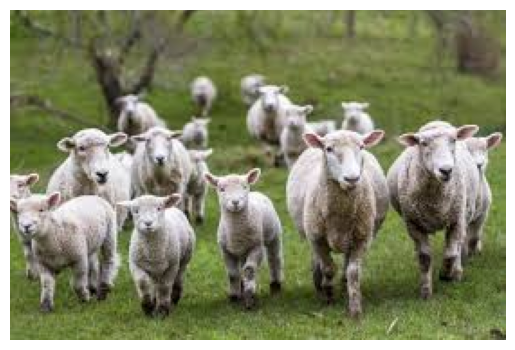

Large herd detected.Alerting on map.
Map saved as herd_alert_map.html


In [3]:
model = YOLO("yolov8n.pt")  
api_key = "6d1ec24732824b40aca6458e49c39658"  
geo = OpenCageGeocode(api_key)

def detect_animl(img_path, loc):
    img = cv2.imread(img_path)  
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = model(img)  

    detec_animl = {}
    animl_cls = {16: "Dog", 17: "Horse", 18: "Sheep", 19: "Cow", 20: "Elephant"}
    
    for r in results:
        for b in r.boxes:
            cls_id = int(b.cls[0])
            animl = r.names[cls_id]
            detec_animl[animl] = detec_animl.get(animl, 0) + 1

    for a, c in detec_animl.items():
        print(f"\nDetected {c} {a} in image.")
    
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.show()

    if any(c >= 10 for c in detec_animl.values()):
        print("Large herd detected.Alerting on map.")
        animl = ', '.join(detec_animl.keys())
        map_alert(loc, f"{detec_animl} detected!")

def map_alert(loc, alert_txt):
    loc_data = geo.geocode(loc)

    if loc_data:
        lat,lon = loc_data[0]['geometry']['lat'], loc_data[0]['geometry']['lng']
        map_objct = folium.Map(location=[lat, lon], zoom_start=12)
        folium.Marker([lat, lon], popup=alert_txt, icon=folium.Icon(color="red")).add_to(map_objct)
        map_objct.save("herd_alert_map.html")
        print("Map saved as herd_alert_map.html")
    else:
        print("Unable to get location coordinates!")

detect_animl("C:/Users/HP/PAI Lab/herd.jpg", "Bakar Mandi, Lahore, Pakistan")